<center> <h1>Homework 6 | DATA 5600</h1> </center>
<center> <h2>Multiple Linear Regression Additional Variable Types</h2> </center>
<center> <h3> Dallin Moore <h3> <center>

In [1]:
# load packages here
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm

## Data and Description

**Note that for the sake of length for this homework assignment, I am not having you check the model assumptions. You certainly can, if you would like, and in "real life" you would definitely need to do this prior to any statistical inference.**

Macroeconomists often speculate that life expectancy is linked with the economic well-being of a country. Macroeconomists also hypothesize that Organization for Economic Co-operation and Development (OECD) (an international think tank charged with promoting policies that will improve global social and economic well-being) members will have longer life expectancy. To test these hypotheses, the LifeExpectancy.txt data set (found on Canvas) contains the following information:

| Variable | Description|
|-|-|
| LifeExp| Average life expectancy in years|
| Country| Country name|
| Group| Is the country a member of OECD, Africa, or other? |
| PPGDP| Per person GDP (on the log scale)|

The Group variable indicates if the country is a member of the OECD, a member of the African continent, or belonging to neither group (other). **Note that the Country variable is just for your reference - you will not use this variable in your model.**

Download LifeExpectancy.txt, and put it in the same folder this Jupyter Notebook.



#### 0. Replace the text "\< YOUR NAME HERE \>" (above) with your full name.



#### 1. Read in the data set, call it "life" and remove the "Row" column. Print a summary of the data, and expore the data to make sure the data makes sense. [1 point]

In [2]:
life = pd.read_csv('LifeExpectancy.txt', sep=' ', index_col=0)
life.head()

,Country,Group,PPGDP,LifeExp
Row,,,,
1,Albania,other,8.209907,75.31
2,Anguilla,other,9.528801,79.19
3,Argentina,other,9.122831,77.72
4,Armenia,other,8.016549,74.54
5,Aruba,other,10.036772,79.80


#### 2. Create and print a scatterplot with the response on the $y$-axis and the other continuous variable on the $x$-axis. Comment on the the relationship between these two variables. [2 points]

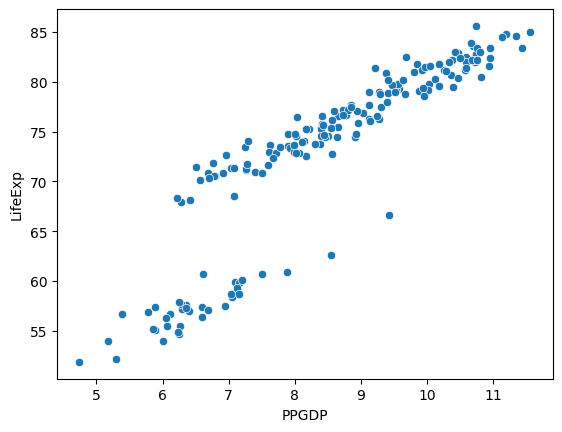

In [4]:
sns.scatterplot(x='PPGDP', y='LifeExp', data=life)
plt.title('Scatterplot of Life Expectancy vs. PPGDP')
plt.show()

Overall the relationship is a strong, positive, linear relationship. It also appears that there are 2 distinct models with similar correlation.


#### 3. Create and print a boxplot with the response on the $y$-axis and the categorical variable on the $x$-axis. Comment on the the relationship between these two variables. [2 points]

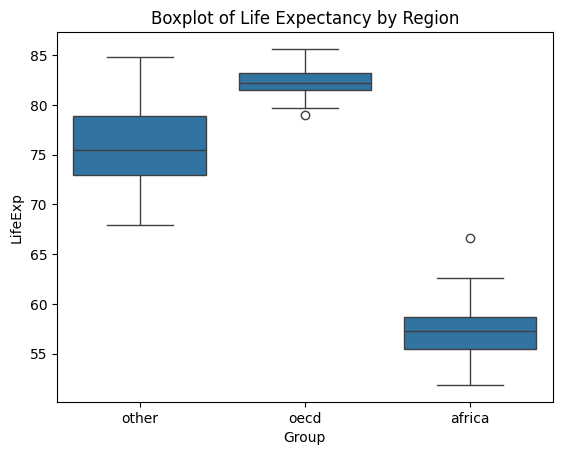

In [7]:
sns.boxplot(x='Group', y='LifeExp', data=life)
plt.title('Boxplot of Life Expectancy by Region')
plt.show()

The average life expectancy in Africa is much lower than in countries part of the OECD. Countries not included in either group have average life expectancy between OECD and Africa, although the average is closer to OECD. Other also has more spread and less outliers than OECD or Africa.

#### 4. Create and print a color-coded scatterplot using all of the variables that will be in your model. Hint: plot the response on the $y$-axis, the other continuous variable on the $x$-axis, and color the points by the categorical variable. [1 point]

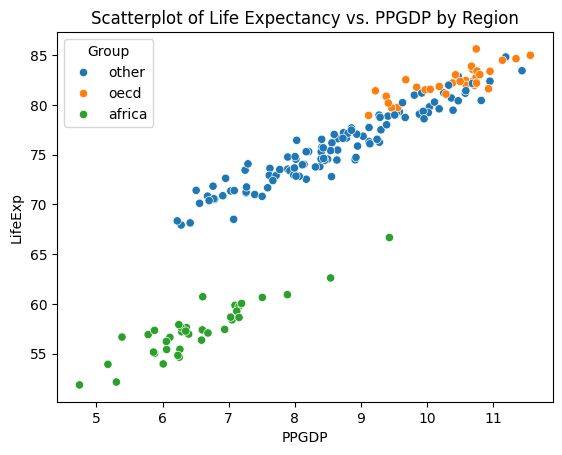

In [8]:
# Create and print a color-coded scatterplot using all of the variables that will be in your model. Hint: plot the response on the $y$-axis, the other continuous variable on the $x$-axis, and color the points by the categorical variable.
sns.scatterplot(x='PPGDP', y='LifeExp', hue='Group', data=life)
plt.title('Scatterplot of Life Expectancy vs. PPGDP by Region')
plt.show()

#### 5. Write out the general/theoretical model (using Greek letters/parameters) that you are thinking about applying to this data set (you will not write out the fitted model using coefficients, because you have not fit a model yet;)). DO NOT include interactions at this step. Remember, you will need to use dummy variables for Group. **USE "other" AS THE BASELINE CATEGORY**. Use variable names that are descriptive (not $y$, $x_1$, etc.). [2 points]

The general model without interactions is:

$ \text{LifeExp}_i = \beta_0 + \beta_1 \text{PPGDP}_i + \beta_2 \text{OECD}_i + \beta_3 \text{Africa}_i + \epsilon_i \overset{\text{iid}}{\sim} N(0, \sigma^2) $

Where:
- $\text{LifeExp}_i$ is the life expectancy for country $i$
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for per person GDP
- $\beta_2$ is the coefficient for the dummy variable indicating if the country is a member of OECD
- $\beta_3$ is the coefficient for the dummy variable indicating if the country is a member of Africa
- $\epsilon_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ = The error term for observation $i$, assumed to be independently and identically distributed (iid) and drawn from a normal distribution with a mean of 0 and a variance of $\sigma^2$.


#### 6. Code indicator/dummy variables for Group. [1 point]

In [25]:
life_dummy = pd.get_dummies(life, columns=['Group'], dtype=int)
life_dummy.drop('Group_other', axis=1, inplace=True)
life_dummy.head()

,Country,PPGDP,LifeExp,Group_africa,Group_oecd
Row,,,,,
1,Albania,8.209907,75.31,0,0
2,Anguilla,9.528801,79.19,0,0
3,Argentina,9.122831,77.72,0,0
4,Armenia,8.016549,74.54,0,0
5,Aruba,10.036772,79.80,0,0


#### 7. Fit a multiple linear regression model to the data (no transformations, no interactions, etc.) using "other" as the baseline for group. Print a summary of the results. [1 point]

In [55]:
# Define the variables
X = sm.add_constant(life_dummy[['PPGDP', 'Group_africa', 'Group_oecd']])
y = life_dummy['LifeExp']

# Fit the model
model = sm.OLS(y, X)
res = model.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     4080.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.48e-163
Time:                        17:35:33   Log-Likelihood:                -268.31
No. Observations:                 181   AIC:                             544.6
Df Residuals:                     177   BIC:                             557.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           50.9579      0.653     78.070      0.000      49.670      52.246
PPGDP            2.8769      0.075     38.470      0.000       2.729       3.024
Group_africa   -12.2943      0.257    -47.789      0.000     -12.802     -11.787
Group_oecd       1.5298      0.254      6.019      0.000       1.028       2.031
==============================================================================
Omnibus:                        0.441   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.333
Skew:                           0.105   Prob(JB):                        0.847
Kurtosis:                       3.015   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8. Briefly interpret the intercept (like we did in class). **Note that you will need to use the word "average" (or similar) twice since you are predicting an average already.** You will need to do this (say average twice) here and with the questions that follow when interpreting. [2 points]


On average, when the `PPGPDP` is 0, and the `Group` is other, the average life expectancy is 50.96 years old.


#### 9. Briefly interpret the coefficient for PPGDP (log scale) (like we did in class). You do not need to un-transform anything - you can just write something like "per person GDP (log scale)" in your response. [2 points]



Holding Group constant, on average, for every 1 unit increase in `PPGDP`, the average life expectancy increases by 2.8769.

(More accurately: 
Holding Group constant, on average, for every 1% increase in `PPGDP`, the average life expectancy increases by 0.028769.)


#### 10. For equal per person GDP (log scale), how does life expectancy change for countries that are members of the OECD compared to countries that are on the African continent? Show how you obtained this number, and briefly interpret this number (like we did in class). [2 points]


In [69]:
res.params['Group_oecd']-res.params['Group_africa']

13.824099337986645

For equal per person GDP (log scale), the life expectancy in OECD countries is about 13.82 years higher compared to countries on the African continent. This suggests that, despite similar economic conditions in terms of GDP, countries in the OECD tend to have significantly better life expectancies compared to African countries, likely due to factors beyond GDP, such as healthcare, education, and infrastructure. (This was obtained with the code above, subtracting the coefficient for Africa and the coefficient for OECD.)

#### 11. Briefly interpret the 95% confidence interval for I(Group=Africa). [2 points]


We are 95% confident that countries in Africa have, on average, a Life Expectancy between -12.802 and -11.787 years lower than countries that are part of the other category.

#### 12. Use the `anova_lm` function from statsmodels to conduct a hypothesis test that tests if Group as a whole has a significant effect on LifeExp. What do you conclude from the result of the test? Hint: you will need to create another linear model and compare it with the one you made previously. [2 points]

In [40]:
# Create another linear model without the Group variables
X_no_group = sm.add_constant(life_dummy[['PPGDP']])
res_no_group = sm.OLS(y, X_no_group).fit()

# Conduct the ANOVA test
anova_lm(res_no_group, res)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,179.0,2858.842765,0.0,NaN,NaN,NaN
1,177.0,205.477622,2.0,2653.365143,1142.814545,6.409470e-102


Based on the results of the ANOVA test, we conclude that `Group` has a highly significant effect on life expectancy. The p-value is effectively zero, meaning there is very strong evidence that countries' group membership (whether they are in the OECD, Africa, or the baseline group) significantly influences life expectancy, even when controlling for GDP.


#### 13. Create a 95% prediction interval for the average life expectancy of a country in the OECD with an average per person GDP (log scale) of 9.5. Print the result, and briefly interpret this interval (like we did in class). (Use the `get_prediction` function on the `OLS` object.) [2 points]

In [35]:
# Define the new data point for prediction
new_data = pd.DataFrame({'const': [1], 'PPGDP': [9.5], 'Group_africa': [0], 'Group_oecd': [1]})

# Get the prediction interval
prediction = res.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)

# Print the prediction interval
prediction_summary[['obs_ci_lower', 'obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,77.654243,81.982328


We are 95% confident that a new observation of life expectancy for a country with the same values of predictors (`PPGDP` = 9.5, `Group` = OECD) will fall between 77.65 years and 81.98 years.

#### 14. Plot the fitted model on the scatterplot with the two continuous variables on the axes, colored by the categorical variable. Hint: you should have 3 different lines on your plot, and you will *not* need to have different line types or point shapes (you *will* need to have different colors). [1 point]


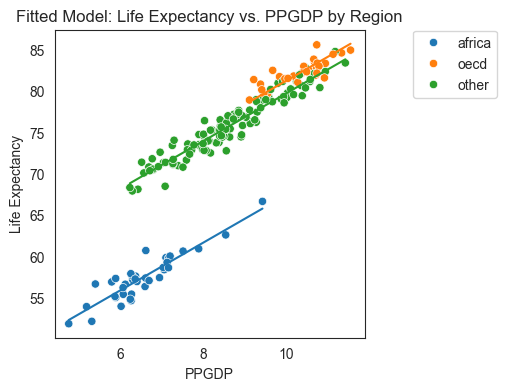

In [59]:
sns.set_style("white")
plt.figure(figsize = (4, 4))
sns.scatterplot(data = life, 
                x = 'PPGDP', 
                y = 'LifeExp', 
                hue = 'Group')
sns.lineplot(x = life['PPGDP'],
             y = res.fittedvalues,
             hue = life['Group'], 
             legend = False)
plt.xlabel('PPGDP')
plt.ylabel('Life Expectancy')
plt.title('Fitted Model: Life Expectancy vs. PPGDP by Region')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

#### 15. Fit a multiple linear regression model to the data **using the dummy variables you created**, and include an interaction term between PPGDP and Group. *USE "other" AS THE BASELINE CATEGORY FOR GROUP*. Print a summary of the results. [1 point]

In [54]:
life_dummy['PPGDP_Group_africa'] = life_dummy['Group_africa'] * life_dummy['PPGDP']
life_dummy['PPGDP_Group_oecd'] = life_dummy['Group_oecd'] * life_dummy['PPGDP']

y = life_dummy['LifeExp']
X_inter = sm.add_constant(life_dummy[['Group_africa', 'Group_oecd', 
                                        'PPGDP',
                                        'PPGDP_Group_africa',
                                        'PPGDP_Group_oecd']])
mod_inter = sm.OLS(y, X_inter)
res_inter = mod_inter.fit()
res_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2551.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.98e-161
Time:                        17:32:15   Log-Likelihood:                -263.63
No. Observations:                 181   AIC:                             539.3
Df Residuals:                     175   BIC:                             558.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.4240      0.713     70.734      0.000      49.017      51.831
Group_africa         -11.8951      1.475     -8.063      0.000     -14.807      -8.983
Group_oecd            11.2920      3.213      3.514      0.001       4.950      17.634
PPGDP                  2.9388      0.082     35.896      0.000       2.777       3.100
PPGDP_Group_africa    -0.0413      0.212     -0.194      0.846      -0.461       0.378
PPGDP_Group_oecd      -0.9527      0.313     -3.046      0.003      -1.570      -0.335
==============================================================================
Omnibus:                        0.578   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.381
Skew:                           0.105   Prob(JB):                        0.827
Kurtosis:                       3.078   Cond. No.                         374.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 16. Write out the fitted model (using coefficients values from above) for a model with PPGDP, Group, and an interaction between PPGDG and Group. Remember, you will need to use dummy variables for Group. **USE "other" AS THE BASELINE CATEGORY**. Use variable names that are descriptive (not $y$, $x_1$, etc.). [3 points]


$$ \hat{\text{LifeExp}}_i = 50.96 + 2.8769 \text{PPGDP}_i - 12.294 \text{Group\_africa}_i + 1.526 \text{Group\_oecd}_i - 0.876 (\text{PPGDP}_i \times \text{Group\_africa}_i) + 0.456 (\text{PPGDP}_i \times \text{Group\_oecd}_i) $$

#### 17. Use the `anova_lm` function from statsmodels to test if the overall interaction between PPGDP and Group is significant. Print the result. What do you conclude? [2 points]

In [56]:
anova_lm(res,res_inter)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,177.0,205.477622,0.0,NaN,NaN,NaN
1,175.0,195.120227,2.0,10.357395,4.644685,0.010828


Based on the results of the ANOVA test, we conclude that the interaction of `PPGDP` and `Group` have a highly significant effect on life expectancy. The p-value is 0.01 (less than alpha=0.05), meaning there is very strong evidence that the interaction between the countries' group membership and PPGDP significantly influences life expectancy, compared to a model without the interaction.

#### 18. Plot the fitted model (with the interaction included) on the scatterplot with the two continuous variables on the axes, colored by the categorical variable. Hint: you should have 3 different lines on your plot, and you will *not* need to have different line types or point shapes (you *will* need to have different colors). [1 point]

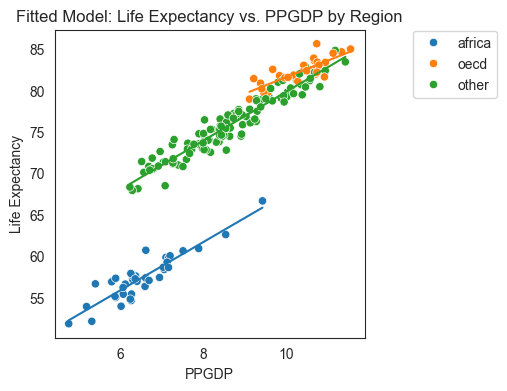

In [60]:
sns.set_style("white")
plt.figure(figsize = (4, 4))
sns.scatterplot(data = life, 
                x = 'PPGDP', 
                y = 'LifeExp', 
                hue = 'Group')
sns.lineplot(x = life['PPGDP'],
             y = res_inter.fittedvalues,
             hue = life['Group'], 
             legend = False)
plt.xlabel('PPGDP')
plt.ylabel('Life Expectancy')
plt.title('Fitted Model: Life Expectancy vs. PPGDP by Region')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.45, 1.02))
plt.show()

#### 19. How did the fitted lines change when you included an interaction term compared with when you did not include an interaction term? [1 point]


The line for Africa and other appear to be exactly the same, but the line for OECD has changed. While the Africa and other line are parallel (as were all three in the original), the OECD line is less positive than the other two lines.

#### 20. What is the effect of PPGDP on LifeExp for countries in a country other than those in the OECD or Africa (i.e. in the "other" category)? You should report a number in a complete sentence (as done in class toward the end of the notes). Since this is a continuous-categorical interaction, and since we are focusing on the effect of the continuous variable, you should use the "one unit increase" terminology in your response. [2 points]

In [64]:
# Extract the coefficient for PPGDP from the regression results
res_inter.params['PPGDP']

2.938817840245774

For countries in the `Group_other` category, that is *not* in Africa or OECD, a one-unit increase in PPGDP is associated with an increase in Life Expectancy of 2.939 years, assuming all other variables remain constant.

#### 21. What is the effect of PPGDP on LifeExp for countries in the OECD? You should report a number in a complete sentence (as done in class toward the end of the notes). Since this is a continuous-categorical interaction, and since we are focusing on the effect of the continuous variable, you should use the "one unit increase" terminology in your response. [2 points]

In [65]:
# Calculate the effect of PPGDP on LifeExp for countries in the OECD
res_inter.params['PPGDP'] + res_inter.params['PPGDP_Group_oecd']

1.986141479852966

For countries in the `Group_oecd` category, a one-unit increase in PPGDP is associated with an increase in Life Expectancy of 1.986 years, assuming all other variables remain constant.

#### 22. What is the effect of PPGDP on LifeExp for countries in Africa? You should report a number in a complete sentence (as done in class toward the end of the notes). Since this is a continuous-categorical interaction, and since we are focusing on the effect of the continuous variable, you should use the "one unit increase" terminology in your response. [2 points]

In [66]:
# Calculate the effect of PPGDP on LifeExp for countries in the Africa
res_inter.params['PPGDP'] + res_inter.params['PPGDP_Group_africa']

2.8975368946600204

For countries in the `Group_africa` category, a one-unit increase in `PPGDP` is associated with an increase in Life Expectancy of 2.898, assuming all other variables remain constant.

#### 23. What is the effect of belonging to the OECD on LifeExp for countries with a PPGDP of 9? You should report a number in a complete sentence (as done in class toward the end of the notes). [2 points]

In [67]:
# Calculate the effect of belonging to the OECD on LifeExp for countries with a PPGDP of 9
res_inter.params['Group_oecd'] + res_inter.params['PPGDP_Group_oecd'] * 9

2.717927219907331

For countries with a PPGDP of 9, belonging to the OECD is associated with an increase in Life Expectancy of 2.718 years, assuming all other factors remain constant.

#### 24. What is the effect of belonging to the OECD on LifeExp for countries with a PPGDP of 11? You should report a number in a complete sentence (as done in class toward the end of the notes). [2 points]

In [68]:
# Calculate the effect of belonging to the OECD on LifeExp for countries with a PPGDP of 9
res_inter.params['Group_oecd'] + res_inter.params['PPGDP_Group_oecd'] * 11

0.8125744991217143

For countries with a PPGDP of 11, belonging to the OECD is associated with an increase in Life Expectancy of 0.813 years, assuming all other factors remain constant.

#### 25. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways. [1 point]


In the analysis, we were looking to understand the relationship between economic well-being (represented by per Person GDP, PPGDP) and life expectancy across different countries. We investigated whether countries that are members of the Organization for Economic Co-operation and Development (OECD) or are part of the continent of Africa tend to have longer life expectancies compared to other nations, and if PPGDP correlated with life expectancy.

From the dataset, we learned that there is a correlation between a country's economic indicators and the life expectancy of its citizens. We also found that as PPGDP increases, the effect of PPGDP on life expectancy decreases. Our findings suggest that being part of the OECD is associated with higher life expectancy, indicating that economic policies and support from this organization might contribute to better health outcomes. This insight could guide future investments and strategies aimed at enhancing the quality of life in different regions.

